# Question 1
This is first work to import and see the datas

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
filepath = "../course_stuff/lab3/iris_data.csv"

In [3]:
data = pd.read_csv(filepath)
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
data.shape[0] #number of rows

150

In [5]:
dataass = data.columns #this is will read the columns names
dataass.tolist() #or list(data) typecasting also is used

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
data.dtypes #to check the data types of all the colums

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the names and species counts and use statistics to find mean,median and ranges(min-max)

In [7]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min'] #this calculates row by row by taking min and max to find the range for ex 50 - 30 = 20 so 20 is the range
stats_df

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000

In [10]:
out_fields = ['mean','25%','50%','75%','range'] #names should be in stats_df
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%':'median'},inplace=True) #inplace argument will update straingt to the variable


In [11]:
stats_df

sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000

## Statistics calculation using groupby

Solutions using statistics using pandas

In [12]:
#mean calculation
data.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [13]:
data.groupby('species').median()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

In [14]:
data.groupby('species').agg(['mean','median']) # this is print both mean and median then print so we can do it in same line of code
%time

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 15 µs


In [15]:
%time
data.groupby('species').agg([np.mean, np.median]) 

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 26.7 µs


sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [16]:
# to compute the single column or do any single operation in one column we can use the below method

from pprint import pprint
agg_dict = {field: ['mean','median'] for field in data.columns if field != 'species'}

In [17]:
agg_dict['petal_length'] = 'max'

In [18]:
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

# method finish

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5
Scatterplot to see the relationship of the sepal length and sepal width

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

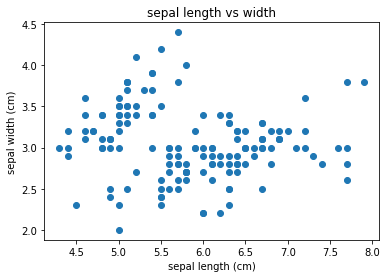

In [20]:
ax = plt.axes() # to create empty graph axes
ax.scatter(data.sepal_length,data.sepal_width)
ax.set(xlabel='sepal length (cm)',ylabel='sepal width (cm)',title='sepal length vs width');

## Question 6 
### histogram

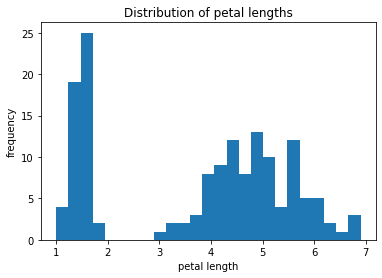

In [21]:
ax = plt.axes()
ax.hist(data.petal_length,bins=25) # take of the bins to see changes in y values
ax.set(xlabel='petal length', ylabel='frequency', title='Distribution of petal lengths'); # ;semicolon will stop the text from axes

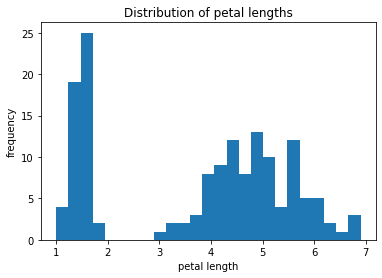

In [22]:
##using pandas plotting functionality

ax = data.petal_length.plot.hist(bins=25)
ax.set(xlabel='petal length', ylabel='frequency', title='Distribution of petal lengths');

# Quesiton 7

Using Seaborn to visualize

In [23]:
!pip install seaborn
import seaborn as sns

Text(0.5, 0, 'size (cm)')

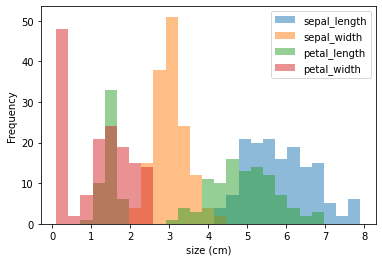

In [24]:
ax = data.plot.hist(bins=25,alpha=0.5) #alpha is color gradient to see mixed values also 
ax.set_xlabel('size (cm)')

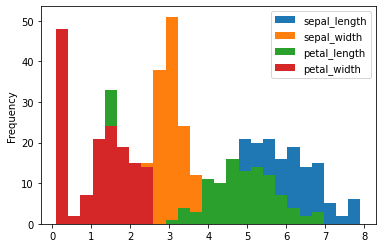

In [25]:
ax = data.plot.hist(bins=25) # without alpha

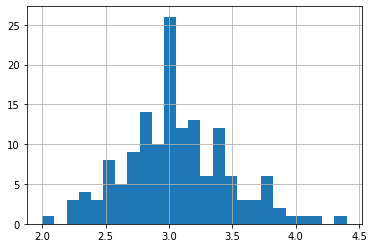

In [26]:
axlist = data.sepal_width.hist(bins=25) # to create seperate histograms for datas

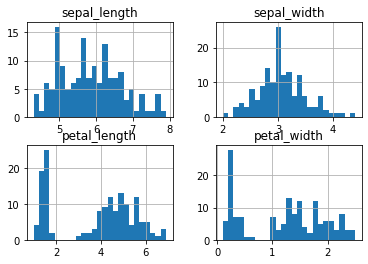

In [27]:
axlist = data.hist(bins=25)

In [28]:
axlist.flatten()[0].is_last_row()

/tmp/ipykernel_6067/2962956051.py:1: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  axlist.flatten()[0].is_last_row()


False

/tmp/ipykernel_6067/1163534829.py:4: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/tmp/ipykernel_6067/1163534829.py:6: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


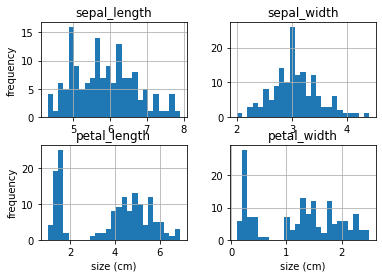

In [29]:
axlist = data.hist(bins=25)
# add some x and y labels to first columns and last row
for ax in axlist.flatten():
    if ax.is_last_row():
        ax.set_xlabel('size (cm)')
    if ax.is_first_col():
        ax.set_ylabel('frequency')


## Question 8
### Box Plot using pandas

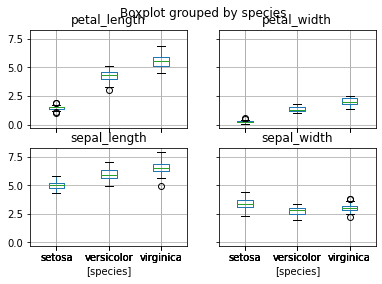

In [30]:
data.boxplot(by='species');

In [31]:
plotdata = (data
            .set_index('species')
            .stack()
            .to_frame()
           .reset_index()
           .rename(columns={0:'size','level_1':'measurement'}))

In [32]:
plotdata.head()

species   measurement  size
0  setosa  sepal_length   5.1
1  setosa   sepal_width   3.5
2  setosa  petal_length   1.4
3  setosa   petal_width   0.2
4  setosa  sepal_length   4.9

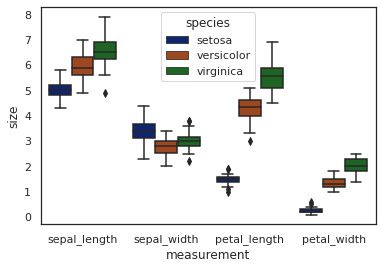

In [33]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f=plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', #measurement and size are the values of plotdata
            hue='species', data=plotdata);

## Question 10
### pairplot

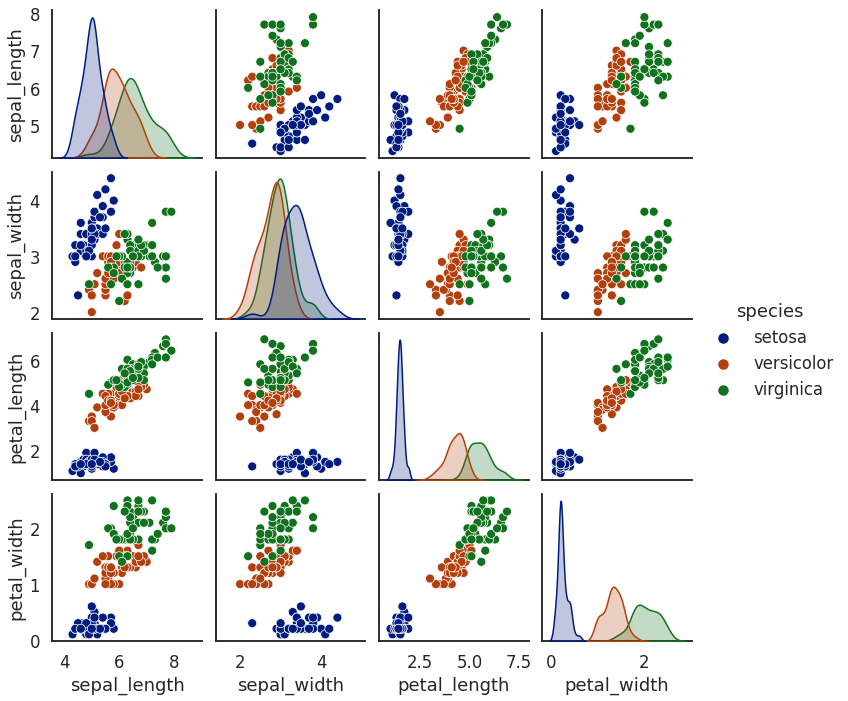

In [34]:
sns.set_context('talk')
sns.pairplot(data,hue='species');

# Feature Engineering 

## Question 1

### EDA

In [2]:
#for numpy and matplotlib in singly namespace
%pylab inline
#for high resolution images
%config InlineBackend.figure_formats=['retina'] 

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
#loadind the data
filepath = "../course_stuff/lab4/data/Ames_Housing_Data.tsv"
df = pd.read_csv(filepath,sep="\t")  #it is tab seperated file
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [4]:
df.info() #to examine the columns and the missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [51]:
df['Gr Liv Area']

0       1656
1        896
2       1329
3       2110
4       1629
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929    2000
Name: Gr Liv Area, Length: 2930, dtype: int64

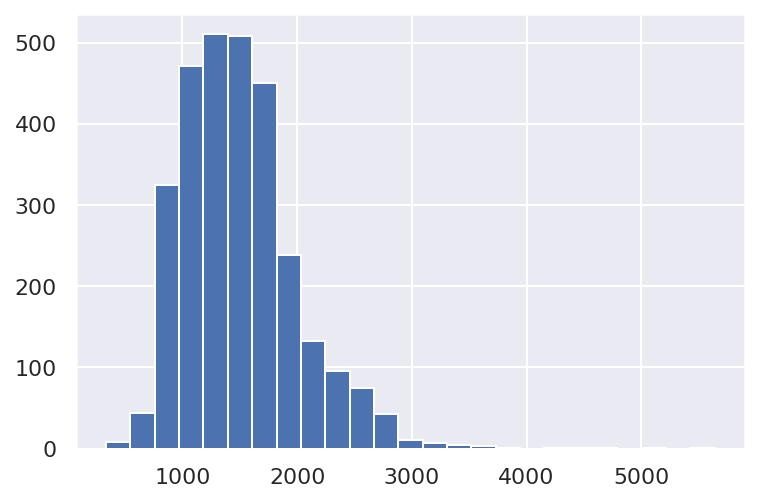

In [6]:
ax = plt.axes()
ax.hist(df['Gr Liv Area'],bins=25);

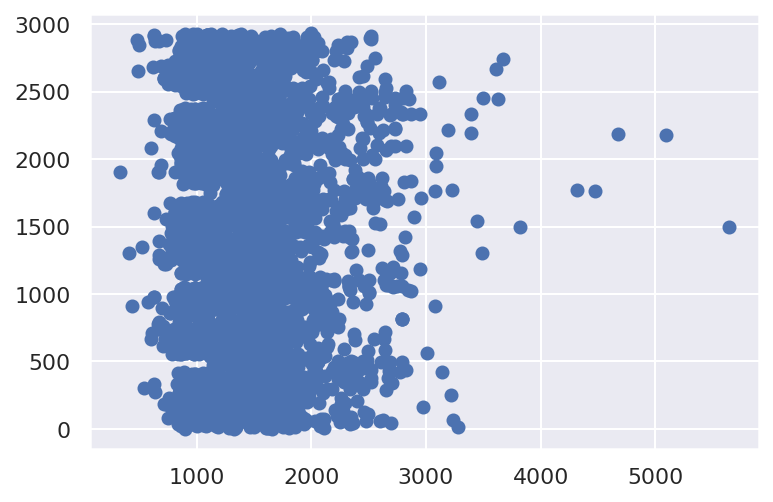

In [7]:
ax = plt.axes()
ax.scatter(df['Gr Liv Area'],df['Order']); # you can see the x with some outlier like after 4000 in x are outlier in this case so we are now going to remove

In [8]:
df = df.loc[df['Gr Liv Area'] <= 4000,:]

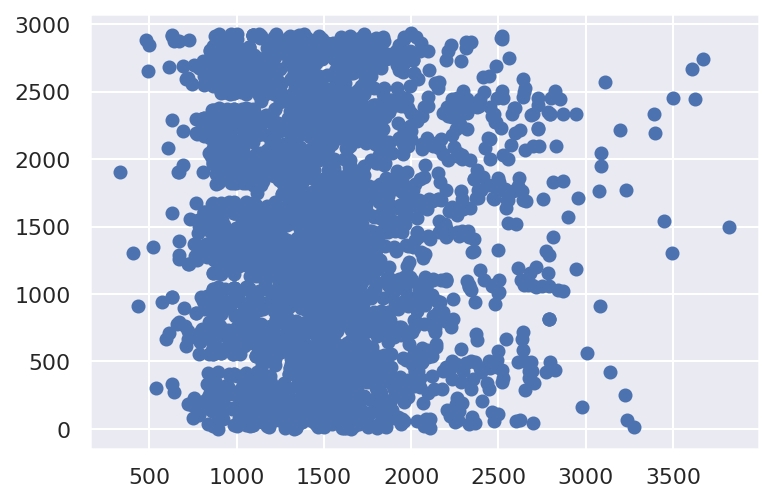

In [9]:
ax = plt.axes()
ax.scatter(df['Gr Liv Area'],df['Order']); # now we can the outliers are removed

In [10]:
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() #keep copy of original data for later use

Number of rows in the data: 2925
Number of columns in the data: 82


In [74]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

## Now we are going to do some data cleaning methods

### 1. Converting Categorial Variables to dummies
### 2. Making Skew variables symmetric

In [11]:
# one hot encoding for dummy variables
one_hot_encode_cols = df.dtypes[df.dtypes == np.object] #filtering string categorial
one_hot_encode_cols = one_hot_encode_cols.index.tolist() #to converting all results to list of categorials


/tmp/ipykernel_6043/415492140.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = df.dtypes[df.dtypes == np.object] #filtering string categorial


In [12]:
df[one_hot_encode_cols].head().T # T is transpose visa versa of columns and rows

0        1        2        3        4
MS Zoning            RL       RH       RL       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      Reg      IR1      Reg      IR1
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Inside   Corner   Corner   Inside
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1        Norm    Feedr     Norm     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   2Story
Roof Style          Hip    Gable      Hip      Hip    Gable
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd    Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type      Stone     None  BrkFace     None     None
Exter Qual           TA       TA       TA       Gd       TA
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual            TA       TA       TA       TA       Gd
Bsmt Cond            Gd       TA       TA       TA       TA
Bsmt Exposure        Gd       No       No       No       No
BsmtFin Type 1      BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin Type 2      Unf      LwQ      Unf      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       TA       TA       Ex       Gd
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       Gd       Ex       TA
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd      NaN      NaN       TA       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Unf      Unf      Fin      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        Y        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN    MnPrv      NaN      NaN    MnPrv
Misc Feature        NaN      NaN     Gar2      NaN      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

In [13]:
df = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

In [14]:
df.describe().T

count          mean           std          min  \
Order                   2925.0  1.464795e+03  8.464417e+02          1.0   
PID                     2925.0  7.143931e+08  1.887274e+08  526301100.0   
MS SubClass             2925.0  5.739658e+01  4.266875e+01         20.0   
Lot Frontage            2435.0  6.902382e+01  2.271092e+01         21.0   
Lot Area                2925.0  1.010358e+04  7.781999e+03       1300.0   
...                        ...           ...           ...          ...   
Sale Condition_AdjLand  2925.0  4.102564e-03  6.393067e-02          0.0   
Sale Condition_Alloca   2925.0  8.205128e-03  9.022520e-02          0.0   
Sale Condition_Family   2925.0  1.572650e-02  1.244366e-01          0.0   
Sale Condition_Normal   2925.0  8.246154e-01  3.803608e-01          0.0   
Sale Condition_Partial  2925.0  8.273504e-02  2.755284e-01          0.0   

                                25%          50%          75%           max  
Order                         732.0       1463.0       2199.0  2.930000e+03  
PID                     528477030.0  535453210.0  907180130.0  1.007100e+09  
MS SubClass                    20.0         50.0         70.0  1.900000e+02  
Lot Frontage                   58.0         68.0         80.0  3.130000e+02  
Lot Area                     7438.0       9428.0      11515.0  2.152450e+05  
...                             ...          ...          ...           ...  
Sale Condition_AdjLand          0.0          0.0          0.0  1.000000e+00  
Sale Condition_Alloca           0.0          0.0          0.0  1.000000e+00  
Sale Condition_Family           0.0          0.0          0.0  1.000000e+00  
Sale Condition_Normal           1.0          1.0          1.0  1.000000e+00  
Sale Condition_Partial          0.0          0.0          0.0  1.000000e+00  

[262 rows x 8 columns]

In [15]:
#log transformation skew variables
mask = data.dtypes == np.float

/tmp/ipykernel_6043/3091431330.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float


In [17]:
float_cols = data.columns[mask]
float_cols

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [18]:
skew_limit = 0.75 #define a limit above which we will log transform
skew_vals = data[float_cols].skew()
skew_vals

Lot Frontage      1.111071
Mas Vnr Area      2.565458
BsmtFin SF 1      0.821985
BsmtFin SF 2      4.135900
Bsmt Unf SF       0.925021
Total Bsmt SF     0.399079
Bsmt Full Bath    0.615553
Bsmt Half Bath    3.965970
Garage Yr Blt    -0.382039
Garage Cars      -0.219734
Garage Area       0.213681
dtype: float64

In [19]:
skew_cols = (skew_vals.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}).query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
BsmtFin SF 2    4.135900
Bsmt Half Bath  3.965970
Mas Vnr Area    2.565458
Lot Frontage    1.111071
Bsmt Unf SF     0.925021
BsmtFin SF 1    0.821985

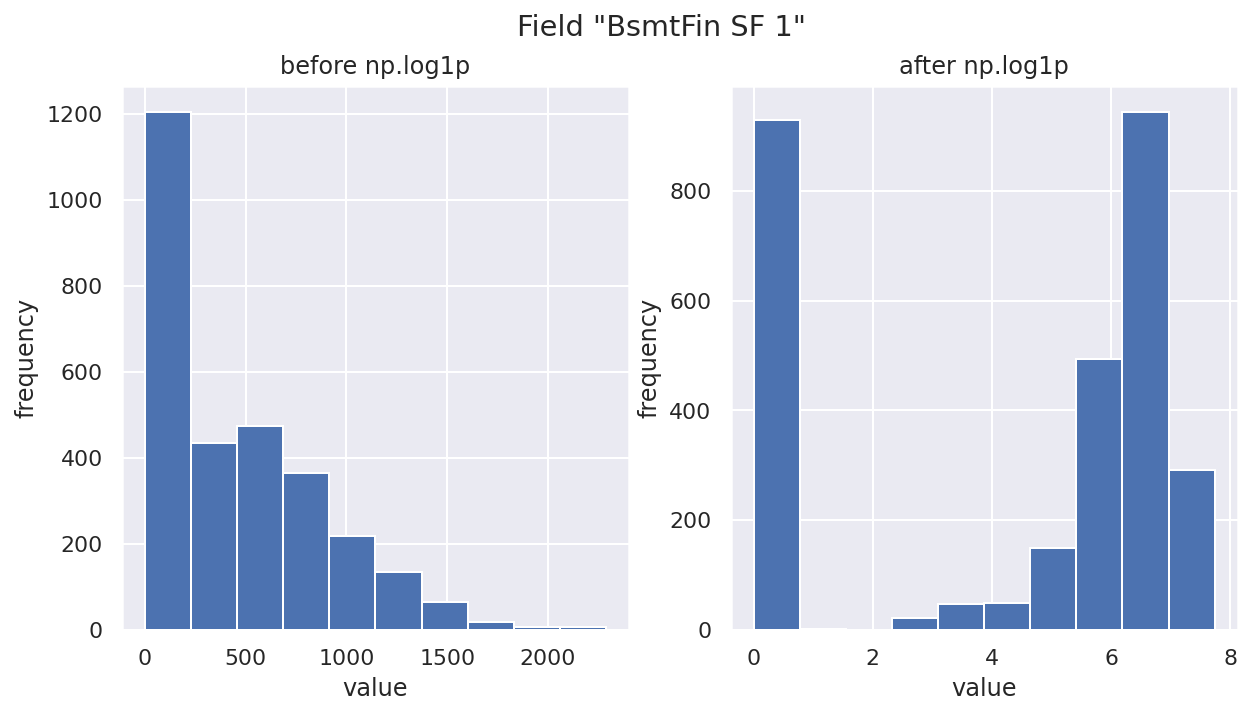

In [20]:
#let's look at what happends to one of these features, when we apply np.log1p visually
field = 'BsmtFin SF 1'
fig, (ax_before, ax_after) = plt.subplots(1,2,figsize=(10,5))
df[field].hist(ax=ax_before)
df[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [27]:
data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [21]:
#perform the skew transformation
for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

In [22]:
df.columns.tolist()

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Insid

In [30]:
#now we have more feautres 
df.shape

(2925, 262)

In [32]:
#now we have lot of variable so detting the saved varaible and look for the empty values
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [33]:
#selecting some of the numeric values columns to illustrate basic feature transformation
smaller_df = df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [34]:
smaller_df.describe()

Lot Area  Overall Qual  Overall Cond   Year Built  Year Remod/Add  \
count    2925.000000   2925.000000   2925.000000  2925.000000     2925.000000   
mean    10103.583590      6.088205      5.563761  1971.302906     1984.234188   
std      7781.999124      1.402953      1.112262    30.242474       20.861774   
min      1300.000000      1.000000      1.000000  1872.000000     1950.000000   
25%      7438.000000      5.000000      5.000000  1954.000000     1965.000000   
50%      9428.000000      6.000000      5.000000  1973.000000     1993.000000   
75%     11515.000000      7.000000      6.000000  2001.000000     2004.000000   
max    215245.000000     10.000000      9.000000  2010.000000     2010.000000   

       Gr Liv Area    Full Bath  Bedroom AbvGr   Fireplaces  Garage Cars  \
count  2925.000000  2925.000000    2925.000000  2925.000000  2924.000000   
mean   1493.978803     1.564786       2.853675     0.596923     1.765048   
std     486.273646     0.551386       0.827737     0.645349     0.759834   
min     334.000000     0.000000       0.000000     0.000000     0.000000   
25%    1126.000000     1.000000       2.000000     0.000000     1.000000   
50%    1441.000000     2.000000       3.000000     1.000000     2.000000   
75%    1740.000000     2.000000       3.000000     1.000000     2.000000   
max    3820.000000     4.000000       8.000000     4.000000     5.000000   

           SalePrice  
count    2925.000000  
mean   180411.574701  
std     78554.857286  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    625000.000000

In [35]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [43]:
smaller_df.isna().sum() # here we can see the garage cars have NA values so we are going to replace with 0

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       1
SalePrice         0
dtype: int64

In [44]:
smaller_df = smaller_df.fillna(0)

In [47]:
smaller_df.isna().sum() #now filled with 0

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       0
SalePrice         0
dtype: int64

## Pair Plot Features

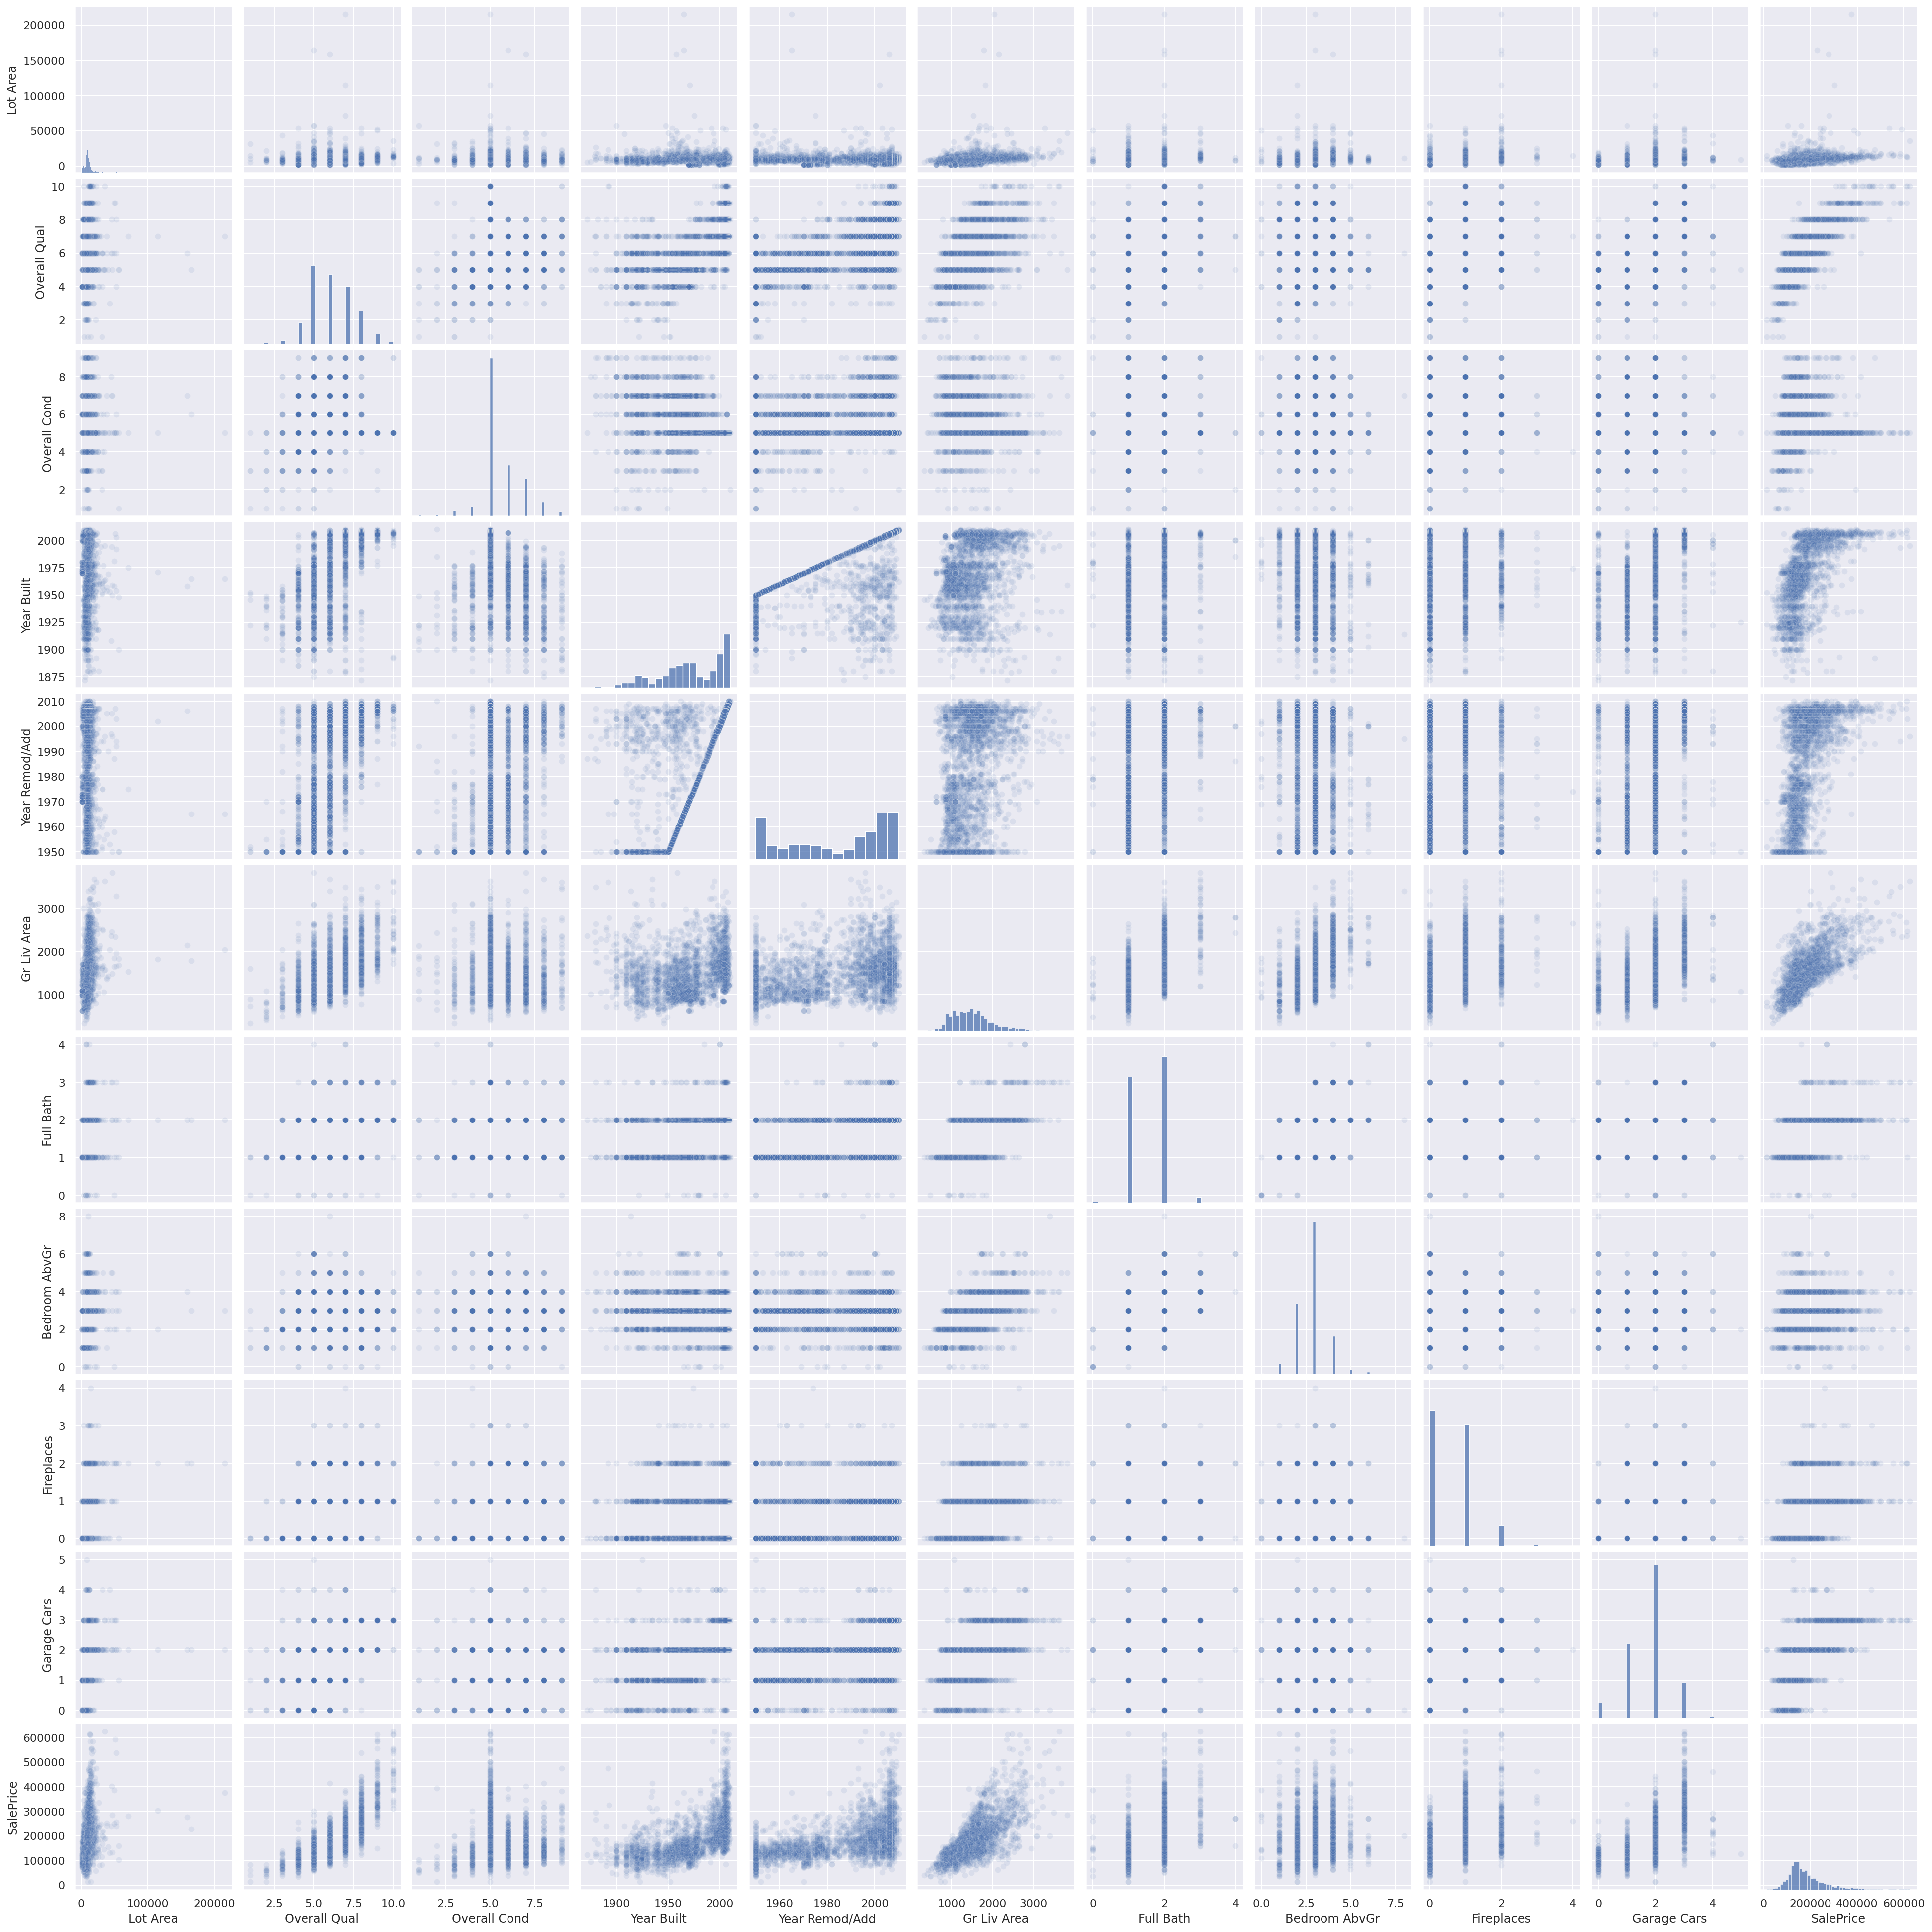

In [49]:
sns.pairplot(smaller_df,plot_kws=dict(alpha=.1))

In [52]:
## suppose our feauteres from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]
y= smaller_df['SalePrice']

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 315.9 KB


## Basic feature engineering: adding polynomial and interaction terms
One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'Overall Qual' and 'Gr Liv Qual', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets.

In [55]:
#polynomial Features

x2 = X.copy()
x2['OQ2'] = x2['Overall Qual']**2
x2['GLA2'] = x2['Gr Liv Area']**2

In [56]:
x2

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0        31770             6             5        1960            1960   
1        11622             5             6        1961            1961   
2        14267             6             6        1958            1958   
3        11160             7             5        1968            1968   
4        13830             5             5        1997            1998   
...        ...           ...           ...         ...             ...   
2925      7937             6             6        1984            1984   
2926      8885             5             5        1983            1983   
2927     10441             5             5        1992            1992   
2928     10010             5             5        1974            1975   
2929      9627             7             5        1993            1994   

      Gr Liv Area  Full Bath  Bedroom AbvGr  Fireplaces  Garage Cars  OQ2  \
0            1656          1              3           2          2.0   36   
1             896          1              2           0          1.0   25   
2            1329          1              3           0          1.0   36   
3            2110          2              3           2          2.0   49   
4            1629          2              3           1          2.0   25   
...           ...        ...            ...         ...          ...  ...   
2925         1003          1              3           0          2.0   36   
2926          902          1              2           0          2.0   25   
2927          970          1              3           0          0.0   25   
2928         1389          1              2           1          2.0   25   
2929         2000          2              3           1          3.0   49   

         GLA2  
0     2742336  
1      802816  
2     1766241  
3     4452100  
4     2653641  
...       ...  
2925  1006009  
2926   813604  
2927   940900  
2928  1929321  
2929  4000000  

[2925 rows x 12 columns]

In [59]:
X3 = x2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

In [60]:
X3

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0        31770             6             5        1960            1960   
1        11622             5             6        1961            1961   
2        14267             6             6        1958            1958   
3        11160             7             5        1968            1968   
4        13830             5             5        1997            1998   
...        ...           ...           ...         ...             ...   
2925      7937             6             6        1984            1984   
2926      8885             5             5        1983            1983   
2927     10441             5             5        1992            1992   
2928     10010             5             5        1974            1975   
2929      9627             7             5        1993            1994   

      Gr Liv Area  Full Bath  Bedroom AbvGr  Fireplaces  Garage Cars  OQ2  \
0            1656          1              3           2          2.0   36   
1             896          1              2           0          1.0   25   
2            1329          1              3           0          1.0   36   
3            2110          2              3           2          2.0   49   
4            1629          2              3           1          2.0   25   
...           ...        ...            ...         ...          ...  ...   
2925         1003          1              3           0          2.0   36   
2926          902          1              2           0          2.0   25   
2927          970          1              3           0          0.0   25   
2928         1389          1              2           1          2.0   25   
2929         2000          2              3           1          3.0   49   

         GLA2  OQ_x_YB   OQ_/_LA  
0     2742336    11760  0.000189  
1      802816     9805  0.000430  
2     1766241    11748  0.000421  
3     4452100    13776  0.000627  
4     2653641     9985  0.000362  
...       ...      ...       ...  
2925  1006009    11904  0.000756  
2926   813604     9915  0.000563  
2927   940900     9960  0.000479  
2928  1929321     9870  0.000500  
2929  4000000    13951  0.000727  

[2925 rows x 14 columns]

In [61]:
data['House Style'].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [62]:
pd.get_dummies(df['House Style'],drop_first=True).head() #https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       0       0       0       1       0     0

In [63]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [64]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [65]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

In [72]:
X4.groupby('Neighborhood').sum()

Lot Area  Overall Qual  Overall Cond  Year Built  \
Neighborhood                                                     
Blmngtn          95182           200           140       56141   
Blueste          23465            66            58       19826   
BrDale           55219           172           163       59155   
BrkSide         751656           553           671      208695   
ClearCr        1093059           263           244       86540   
CollgCr        2669934          1783          1399      533445   
Crawfor        1199961           646           649      200517   
Edwards        1865703           950          1052      373623   
Gilbert        1871491          1075           840      329720   
IDOTRR          820862           440           528      179274   
MeadowV          78034           162           208       72973   
Mitchel        1370276           632           621      225941   
NAmes          4447588          2363          2575      868225   
NPkVill          63379           144           129       45455   
NWAmes         1527682           831           770      258802   
NoRidge         884108           543           358      137685   
NridgHt        1861943          1374           831      332926   
OldTown        1969576          1244          1506      459440   
Other            52686            84            57       21812   
SWISU           365538           261           271       92660   
Sawyer         1566150           765           867      296398   
SawyerW        1269406           792           650      248771   
Somerst        1385143          1347           914      364841   
StoneBr         580553           427           255      101971   
Timber         1312815           518           375      143664   
Veenker         371573           173           143       47561   

              Year Remod/Add  Gr Liv Area  Full Bath  Bedroom AbvGr  \
Neighborhood                                                          
Blmngtn                56153        39337         54             53   
Blueste                19838        11597         12             19   
BrDale                 59190        33457         34             77   
BrkSide               212584       133370        123            284   
ClearCr                87134        76753         71            122   
CollgCr               533790       399464        470            757   
Crawfor               203758       177448        157            305   
Edwards               377003       244108        255            548   
Gilbert               329834       267448        327            513   
IDOTRR                182695       112088        113            244   
MeadowV                73113        39468         41             95   
Mitchel               226368       151391        168            315   
NAmes                 872999       572380        542           1290   
NPkVill                45455        28614         44             59   
NWAmes                259413       221229        243            426   
NoRidge               137766       167333        141            245   
NridgHt               333001       322478        334            453   
OldTown               471777       342242        318            680   
Other                  21833        13375         13             14   
SWISU                  94296        78551         74            165   
Sawyer                298389       178637        178            440   
SawyerW               249142       200508        222            379   
Somerst               364902       292079        362            474   
StoneBr               101986        99410        102            127   
Timber                143760       123454        140            207   
Veenker                47706        43669         39             56   

              Fireplaces  Garage Cars    OQ2       GLA2  OQ_x_YB   OQ_/_LA  
Neighborhood                                                                
Blmngtn               

In [81]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature
    print(X[feature + '_Dev_' + category])

In [82]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

0      -0.590334
1      -0.551186
2      -0.668629
3      -0.277154
4       0.545208
          ...   
2925    0.505068
2926    0.310059
2927    1.096487
2928   -0.042269
2929    0.421480
Name: Year Built_Dev_House Style, Length: 2925, dtype: float64
0       0.857503
1      -0.430205
2       0.857503
3       2.145211
4      -2.101974
          ...   
2925    0.434947
2926   -0.518590
2927   -0.518590
2928   -0.518590
2929    1.388483
Name: Overall Qual_Dev_Neighborhood, Length: 2925, dtype: float64


## polynomial Features in Scikit-Learn

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
pf = PolynomialFeatures(degree=2)

In [85]:
features = ['Lot Area','Overall Qual']

In [87]:
pf.fit(df[features])

PolynomialFeatures()

In [88]:
pf.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [89]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

1  Lot Area  Overall Qual    Lot Area^2  Lot Area Overall Qual  \
0     1.0   31770.0           6.0  1.009333e+09               190620.0   
1     1.0   11622.0           5.0  1.350709e+08                58110.0   
2     1.0   14267.0           6.0  2.035473e+08                85602.0   
3     1.0   11160.0           7.0  1.245456e+08                78120.0   
4     1.0   13830.0           5.0  1.912689e+08                69150.0   
...   ...       ...           ...           ...                    ...   
2920  1.0    7937.0           6.0  6.299597e+07                47622.0   
2921  1.0    8885.0           5.0  7.894322e+07                44425.0   
2922  1.0   10441.0           5.0  1.090145e+08                52205.0   
2923  1.0   10010.0           5.0  1.002001e+08                50050.0   
2924  1.0    9627.0           7.0  9.267913e+07                67389.0   

      Overall Qual^2  
0               36.0  
1               25.0  
2               36.0  
3               49.0  
4               25.0  
...              ...  
2920            36.0  
2921            25.0  
2922            25.0  
2923            25.0  
2924            49.0  

[2925 rows x 6 columns]

## Hypothesis Testing

### here we can study about the null and alternative hypothesis

In [2]:
%pylab inline
%config InlineBackend.figure_formats=['svg']

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

'''
If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. (In a traditional statistics class, this is the part where we'd turn to a table in the back of the book.)
'''

In [11]:
from scipy.stats import binom
prob = 1-binom.cdf(56,100,0.5)
print(str(round(prob*100)) + "%")

10%


The probability of getting 57 or more correct is about 10%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

---

Conversely, we can figure out what the 95% cutoff is beforehand.

--- 

In [7]:
# ppf will give inverse of the cumulative distribution function

from scipy.stats import binom
print(binom.ppf(0.95,100,0.5)+1)

59.0


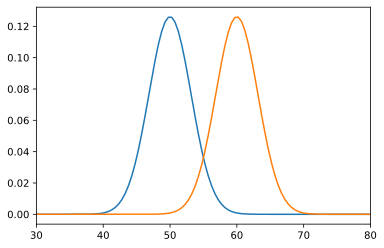

In [12]:
mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

In [16]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

0.06660530960360689
0.3032601298434462


In [ ]:
pr